## import lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

## Data preparation

In [3]:
degradationData = pd.read_csv('train_FD002.txt', sep=' ', header=None,
                  names=['op_setting_1','op_setting_2','op_setting_3',
                        'sensor_1','sensor_2','sensor_3','sensor_4','sensor_5','sensor_6','sensor_7','sensor_8','sensor_9','sensor_10',
                        'sensor_11','sensor_12','sensor_13','sensor_14','sensor_15','sensor_16','sensor_17','sensor_18','sensor_19','sensor_20','sensor_21','sensor_22','sensor_23'])

degradationData.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 53759 entries, (1, 1) to (260, 316)
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   op_setting_1  53759 non-null  float64
 1   op_setting_2  53759 non-null  float64
 2   op_setting_3  53759 non-null  float64
 3   sensor_1      53759 non-null  float64
 4   sensor_2      53759 non-null  float64
 5   sensor_3      53759 non-null  float64
 6   sensor_4      53759 non-null  float64
 7   sensor_5      53759 non-null  float64
 8   sensor_6      53759 non-null  float64
 9   sensor_7      53759 non-null  float64
 10  sensor_8      53759 non-null  float64
 11  sensor_9      53759 non-null  float64
 12  sensor_10     53759 non-null  float64
 13  sensor_11     53759 non-null  float64
 14  sensor_12     53759 non-null  float64
 15  sensor_13     53759 non-null  float64
 16  sensor_14     53759 non-null  float64
 17  sensor_15     53759 non-null  float64
 18  sensor_16     53

In [4]:
## train
degradationData.drop(['sensor_22','sensor_23'], axis=1, inplace=True)
degradationData.reset_index(inplace=True)
degradationData.rename(columns={'level_0':'id', 'level_1':'time'}, inplace=True)
degradationData.head()

,id,time,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


## Split data 

In [5]:
trainData = degradationData[degradationData.id <= 175].copy()
validationData = degradationData[degradationData.id > 175].copy()
trainData.id.nunique(), validationData.id.nunique()

(175, 85)

In [6]:
varNames = degradationData.columns.values
timeVariable = varNames[1]
conditionVariables = varNames[2:5]
dataVariables = varNames[5:]
timeVariable, conditionVariables, dataVariables

('time',
 array(['op_setting_1', 'op_setting_2', 'op_setting_3'], dtype=object),
 array(['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
        'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
        'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
        'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
        'sensor_21'], dtype=object))

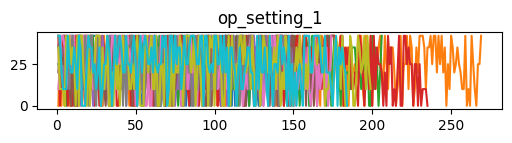

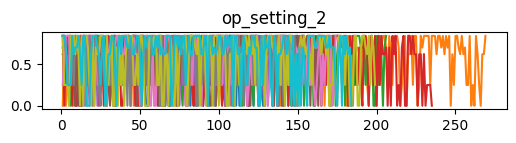

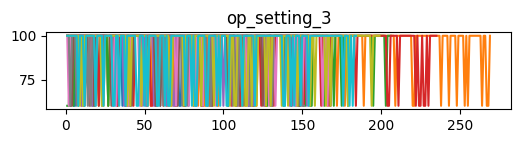

In [7]:
def vis_data(data,list_sensor,nsample):
    '''
    list_sensor: name of columns to visualize
    nsample: number of  ensembles data.
    '''

    start = data.id.unique()[0]
    for x in list_sensor:
        fig = plt.figure(figsize=(6,1))
        plt.title(x)
        
        for i in range(start,start+nsample):
            plt.plot(data[data.id == i].time, data[data.id == i][x])
        plt.show()
    
vis_data(trainData,['op_setting_1','op_setting_2','op_setting_3',],10)

## Clustering 

In [8]:
opCondition = trainData[conditionVariables] # get operating conditions

In [9]:
model_kmeans = KMeans(n_clusters=6, random_state = 0)
model_kmeans.fit(opCondition)
y_means = model_kmeans.predict(opCondition)

In [10]:
trainData['cluster'] = y_means
opCondition['cluster'] = y_means

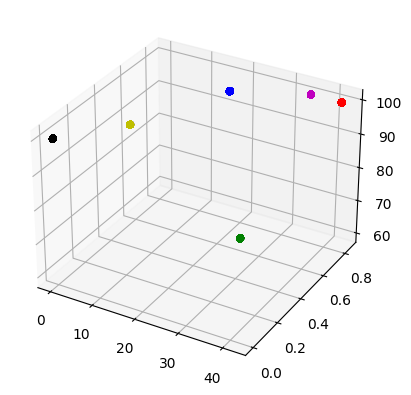

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

opCondition_plt = opCondition[opCondition.cluster == 0].copy()
ax.scatter(opCondition_plt['op_setting_1'],opCondition_plt['op_setting_2'],
           opCondition_plt['op_setting_3'], c='red', label='0')

opCondition_plt = opCondition[opCondition.cluster == 1].copy()
ax.scatter(opCondition_plt['op_setting_1'],opCondition_plt['op_setting_2'],
           opCondition_plt['op_setting_3'], c='blue', label='1')

opCondition_plt = opCondition[opCondition.cluster == 2].copy()
ax.scatter(opCondition_plt['op_setting_1'],opCondition_plt['op_setting_2'],
           opCondition_plt['op_setting_3'], c='green', label='1')

opCondition_plt = opCondition[opCondition.cluster == 3].copy()

ax.scatter(opCondition_plt['op_setting_1'], opCondition_plt['op_setting_2'],
           opCondition_plt['op_setting_3'], c='k', label='1')
opCondition_plt = opCondition[opCondition.cluster == 4].copy()

ax.scatter(opCondition_plt['op_setting_1'], opCondition_plt['op_setting_2'],
           opCondition_plt['op_setting_3'], c='y', label='1')
opCondition_plt = opCondition[opCondition.cluster == 5].copy()
ax.scatter(opCondition_plt['op_setting_1'], opCondition_plt['op_setting_2'],
           opCondition_plt['op_setting_3'], c='m', label='1')

plt.show()

## Normalization

In [12]:
def regimeNormalization(data):
    list_df = []
    Clusters = data.cluster.unique()
    for cluster in Clusters:
        each_cluster = data[data.cluster == cluster].copy()
        sc = StandardScaler()
        each_cluster.loc[:, dataVariables] = sc.fit_transform(each_cluster.loc[:,dataVariables])
        list_df.append(each_cluster)
    res_df = pd.concat(list_df)
    res_df.sort_values(by = ['id','time'], inplace=True)
    return res_df

In [13]:
trainDataNormalized = regimeNormalization(trainData)
trainDataNormalized.head()

,id,time,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,cluster
0,1,1,34.9983,0.8400,100.0,0.0,-1.049946,-1.398221,0.789186,-8.881784e-16,...,-1.450350,-1.588766,0.389890,6.938894e-18,-0.138999,0.0,0.000000e+00,-0.909782,-1.360990,5
1,1,2,41.9982,0.8408,100.0,0.0,0.464414,-0.194127,-0.228321,1.776357e-15,...,-1.274089,-1.091773,0.102630,0.000000e+00,-0.730790,0.0,0.000000e+00,-1.639366,-1.331787,0
2,1,3,24.9988,0.6218,60.0,0.0,1.264393,-1.098780,-0.391473,1.776357e-15,...,-1.062959,-1.074863,-0.426332,3.469447e-18,1.313241,0.0,-1.421085e-14,-1.658612,1.708013,2
3,1,4,42.0077,0.8416,100.0,0.0,-0.427205,-0.051374,-0.150028,1.776357e-15,...,-1.432980,-1.319209,-0.543066,0.000000e+00,-1.437750,0.0,0.000000e+00,0.018773,1.830378,0
4,1,5,25.0005,0.6203,60.0,0.0,0.593379,-0.919418,-0.321444,1.776357e-15,...,-1.171634,-1.355113,-0.375318,3.469447e-18,1.313241,0.0,-1.421085e-14,-1.210646,-0.474588,2


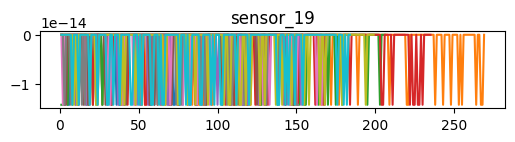

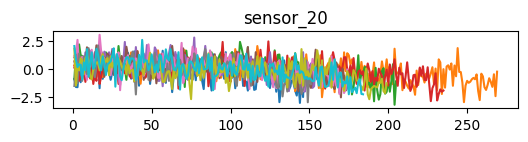

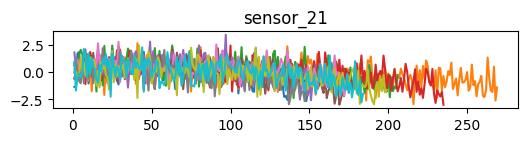

In [14]:
vis_data(trainDataNormalized,dataVariables[18:21],10)

## Make health condition

In [15]:
ids = trainDataNormalized.id.unique()
list_df = []
for idx in ids:
    each_idx = trainDataNormalized[trainDataNormalized.id == idx].copy()
    rul = len(each_idx)
    each_idx['health'] = each_idx.apply(lambda x: (1 - (x.time*1.0/rul)) , axis=1)
    list_df.append(each_idx)
trainDataNormalized = pd.concat(list_df)
trainDataNormalized.head()

,id,time,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,cluster,health
0,1,1,34.9983,0.8400,100.0,0.0,-1.049946,-1.398221,0.789186,-8.881784e-16,...,-1.588766,0.389890,6.938894e-18,-0.138999,0.0,0.000000e+00,-0.909782,-1.360990,5,0.993289
1,1,2,41.9982,0.8408,100.0,0.0,0.464414,-0.194127,-0.228321,1.776357e-15,...,-1.091773,0.102630,0.000000e+00,-0.730790,0.0,0.000000e+00,-1.639366,-1.331787,0,0.986577
2,1,3,24.9988,0.6218,60.0,0.0,1.264393,-1.098780,-0.391473,1.776357e-15,...,-1.074863,-0.426332,3.469447e-18,1.313241,0.0,-1.421085e-14,-1.658612,1.708013,2,0.979866
3,1,4,42.0077,0.8416,100.0,0.0,-0.427205,-0.051374,-0.150028,1.776357e-15,...,-1.319209,-0.543066,0.000000e+00,-1.437750,0.0,0.000000e+00,0.018773,1.830378,0,0.973154
4,1,5,25.0005,0.6203,60.0,0.0,0.593379,-0.919418,-0.321444,1.776357e-15,...,-1.355113,-0.375318,3.469447e-18,1.313241,0.0,-1.421085e-14,-1.210646,-0.474588,2,0.966443


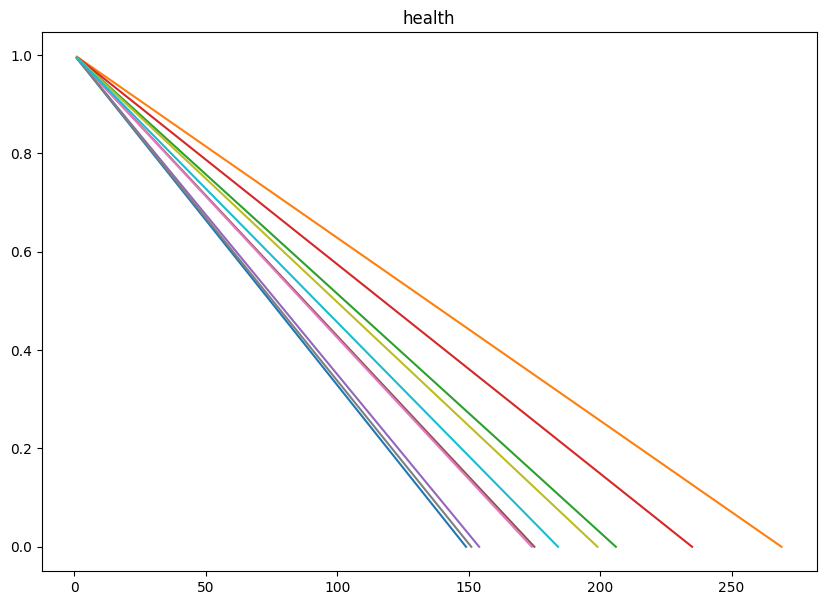

In [16]:
def vis_ensemble(data,list_sensor,nsample):
    start = data.id.unique()[0]
    for x in list_sensor:
        fig = plt.figure(figsize=(10,7))
        plt.title(x)
        for i in range(start,start+nsample):
            plt.plot(data[data.id == i].time, data[data.id == i][x])
        plt.show()
vis_ensemble(trainDataNormalized,['health'],10)

## DegradationSensorFusion 

In [17]:
sensorToFuse = ['sensor_2','sensor_3','sensor_4','sensor_7','sensor_11','sensor_12','sensor_15','sensor_17'] 
X = trainDataNormalized[sensorToFuse]
y = trainDataNormalized.health
regModel = LinearRegression()
regModel.fit(X,y)
weights = regModel.coef_
weights

array([-0.03144579, -0.02900143, -0.05151199,  0.00572367, -0.06626844,
        0.00568951, -0.04490592, -0.03622847])

In [18]:
def degradationSensorFusion(data, sensorToFuse, weights):
    dataFused = pd.DataFrame(data = np.sum(data[sensorToFuse]*weights, axis=1), columns = ['DataFused'])
    dataFused[['id','time']] = data[['id','time']].copy()
    ids = dataFused.id.unique()
    list_df = []
    for idx in ids:
        each_idx = dataFused[dataFused.id == idx].copy()
        each_idx['DataFused'] = each_idx['DataFused'].rolling(window=21, center=True, min_periods=0).mean()
        neg = each_idx['DataFused'].values[0]
        each_idx['DataFused'] = each_idx['DataFused'] + 1 - neg
        list_df.append(each_idx)
    res_df = pd.concat(list_df)
    return res_df
trainDataFused = degradationSensorFusion(trainDataNormalized, sensorToFuse, weights)

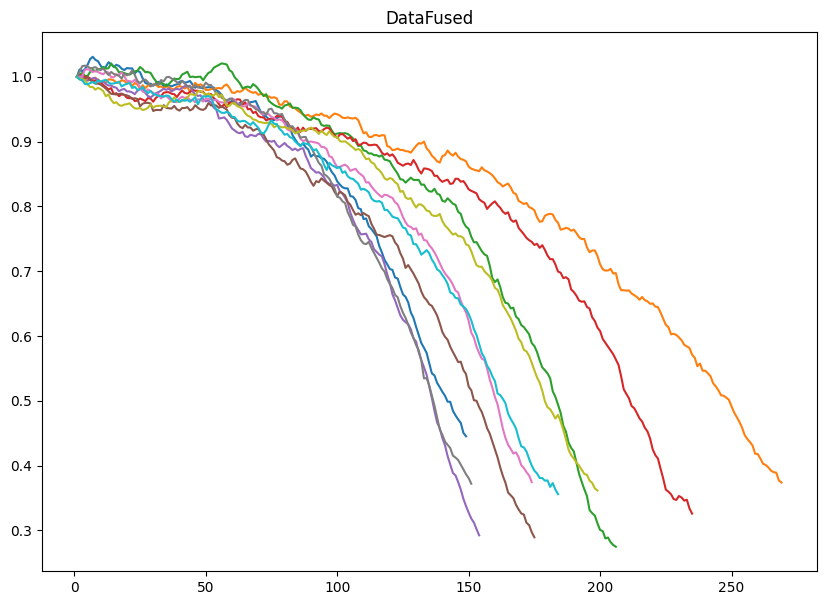

In [19]:
vis_ensemble(trainDataFused,['DataFused'],10)

## Make model RUL

In [21]:
class residualSimilarityModel:
    
    def __init__(self):
        self.df_model = pd.DataFrame(columns = ['id','lifeSpan','poly'], index=None)
    
    def fit(self, dataTrain, polynomial_deg=3): # data train has many machines
        ids = dataTrain.id.unique()
        for idx in ids:
            each_id = dataTrain[dataTrain.id == idx].copy()
            poly = np.polyfit(each_id.time, each_id.DataFused, polynomial_deg) ## Poly 
            self.df_model = self.df_model.append(pd.Series({
                'id':idx,
                'lifeSpan':each_id.time.values[-1],
                'poly':poly,
            }), ignore_index = True)
            
    def predictRUL(self, dataTest, NEIGHBORS_NUM=20): # data test is a machine
        list_score = []
        for poly in self.df_model.poly:
            d_ij = np.linalg.norm(dataTest.DataFused - np.polyval(poly, dataTest.time),ord=1)
            list_score.append(d_ij)
        
        df_pred = self.df_model[['id','lifeSpan']].copy()
        df_pred['score'] = list_score
        df_pred.sort_values(by = 'score',inplace=True)
        df_pred = df_pred[:NEIGHBORS_NUM]
        
        estRUL = df_pred.lifeSpan.mean() - dataTest.time.max()
        ciRUL = [df_pred.lifeSpan.min()- dataTest.time.max(),df_pred.lifeSpan.max()- dataTest.time.max()]
        
        return estRUL, ciRUL, df_pred

## Evaluate

In [24]:
model = residualSimilarityModel()
model.fit(trainDataFused)

test = validataionDataToFused[validataionDataToFused.id == 176].copy()
trueRUL = test.time.max()

sample_len = 20

test = test[:-20]





NameError: name 'validataionDataToFused' is not defined

In [ ]:
def consecutive_predict(train_data, val_unit, min_day_predict=50, polynomial_deg=3, NEIGHBORS_NUM=50):
    model = residualSimilarityModel()
    model.fit(train_data)
    
    
    
    